In [2]:
import sys
import random
from PySide6.QtCore import Qt, QTimer
from PySide6.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

class RealTimePlot(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUI()

    def initUI(self):
        self.layout = QVBoxLayout(self)
        
        # 创建一个 Figure 对象
        self.figure = Figure()
        
        # 在 Figure 上添加一个子图
        self.ax = self.figure.add_subplot(111)
        
        # 创建一个 FigureCanvas 用于显示 Figure
        self.canvas = FigureCanvas(self.figure)
        self.layout.addWidget(self.canvas)
        
        # 初始化数据
        self.x_data = []
        self.y_data = []   # 两条曲线的初始数据
        
        # 绘制两条初始曲线
        self.lines = list(map(lambda x: self.ax.plot([], []])[0], range(4)))
        
        # 定时器，每隔一段时间更新图表
        self.timer = QTimer(self)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start(1000)  # 每1000毫秒（1秒）更新一次

    def update_plot(self):
        # 模拟数据更新

        self.x_data.append(len(self.x_data) + 1)
        self.y_data.append([random.randint(0, 10), random.randint(0, 10), random.randint(0, 10), random.randint(0, 10)])
        # for i in range(len(self.y_data)):
        #     self.y_data[i].append(random.randint(0, 10))
        
        y_data = list(zip(*self.y_data))
        # 更新每条曲线的数据
        for i, y in enumerate(y_data):
            self.lines[i].set_xdata(self.x_data)
            self.lines[i].set_ydata(y)
        
        # 自动调整坐标轴范围
        self.ax.relim()
        self.ax.autoscale_view()
        
        # 刷新画布
        self.canvas.draw()

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Real-Time Plot with PyQt and Matplotlib')
        self.setGeometry(100, 100, 800, 600)
        
        # 创建一个 RealTimePlot 实例
        self.realtime_plot = RealTimePlot(self)
        self.setCentralWidget(self.realtime_plot)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    mainWindow = MainWindow()
    mainWindow.show()
    sys.exit(app.exec())


RuntimeError: Please destroy the QApplication singleton before creating a new QApplication instance.

In [2]:
import socket

def send(data, s):
    start = 0 
    while True:
        send_data = data[start: start + 10000]
        s.sendto(send_data, ('127.0.0.1', 9999))
        start += 10000
        if start >= len(data):
            break


file = 'pickle_file.dat'
data = open(file, 'rb').read()

# 创建 socket 对象
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# 获取本地主机名和端口号
host = '127.0.0.1'
port = 9999

send(data, s )

# 关闭 socket
s.close()


In [16]:
# import xorbits.pandas as xpd
import numpy as np
import pandas as pd 

Anchors = [0x0AFC,0x5B2B,0x08D3,0x7BD3] # 从目前收到的anchor里选择.需要保证顺序可控
tag = 0x45AF # 下拉框选择
filtwindow = 10
dispBufferSize = 1000
TDOALimit = 1
print(Anchors,tag)
data = pd.read_csv("test.csv")
def show(dataBuffer):
    i = np.array(dataBuffer)
    dataslice = np.zeros((len(Anchors),6))+ np.nan;
    for j in range(len(Anchors)):
        if np.any(np.logical_and(i[:,1]==Anchors[j],i[:,2]==tag)):
            dataslice[j,:]=i[np.logical_and(i[:,1]==Anchors[j],i[:,2]==tag),:]
    if(np.all(np.logical_not(np.isfinite(dataslice)))):return None, None, None
    TOA = dataslice[:,3];
    POA_SYNC = dataslice[:,4];
    POA_REPLY = dataslice[:,5];
    POA_SYNC = np.exp(POA_SYNC*2j*np.pi/256);
    POA_REPLY = np.exp(POA_REPLY*2j*np.pi/256);
    TDOA = np.mod(32768 + TOA-TOA[0],65536)-32768;
    TDOA = TDOA * 3e8/(499.2e6*128)
    TDOA[abs(TDOA) > TDOALimit] = TDOA[abs(TDOA) > TDOALimit] * TDOALimit/abs(TDOA[abs(TDOA) > TDOALimit]);# 限幅
    PDOA_SYNC = POA_SYNC*np.conj(POA_SYNC[0]);
    PDOA_REPLY = POA_REPLY*np.conj(POA_REPLY[0]);
    PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);
    return PDOA[None,:], TDOA[None,:]
            # rolling_all.append(i[0,0,None])
            # PDOA_all.append(PDOA[None,:])
            # TDOA_all.append(TDOA[None,:])

resu2 = data.groupby(by='rolling').apply(lambda x: show(x)).sort_index()[-dispBufferSize:]
# for i,k in resu2:
#     print(i)
#     print(k)
#     break
print('123 ', type(resu2))
print('123 ', type(data))
# resu2.apply(func)

[2812, 23339, 2259, 31699] 17839


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17744\1455226593.py:29: RuntimeWarning: invalid value encountered in divide
  PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);


123  <class 'pandas.core.series.Series'>
123  <class 'pandas.core.frame.DataFrame'>


In [17]:
import pandas
import numpy as np
data = pandas.read_csv("TDOA与PDOA集中上传.csv")
resu = []
rolling = None
resu2 = []
for _,i in data.iterrows():
    if rolling != i['rolling']:
        if len(resu2)>0:
            resu2 = pandas.DataFrame(resu2)
            resu.append(resu2)
        rolling = i['rolling']
        resu2 = []
    resu2.append(i)
del resu2 
del rolling 
del i 
del data

In [18]:
Anchors = [0x0AFC,0x5B2B,0x08D3,0x7BD3] # 从目前收到的anchor里选择.需要保证顺序可控
tag = 0x45AF # 下拉框选择
print(Anchors,tag)

[2812, 23339, 2259, 31699] 17839


In [19]:
import time
import numpy as np
class PDOARawDisplay:
    def __init__(self,filtwindow=10,dispBufferSize=1000,TDOALimit=1):
        self.reset()
        # 以下参数用配置文件进行设置
        self.filtwindow = filtwindow;
        self.dispBufferSize = dispBufferSize;
        self.TDOALimit = TDOALimit;
    def reset(self):
        self.dataBuffer = []
    def step(self,frame):
        self.dataBuffer.append(np.array(frame))
        self.dataBuffer=self.dataBuffer[-self.dispBufferSize:]
        
    def show(self,Anchors,tag):
        # 刷新速度不需要很高
        # 如4Hz有困难 1Hz即可
        rolling_all = []
        PDOA_all = []
        TDOA_all = []
        for i in self.dataBuffer:
            dataslice = np.zeros((len(Anchors),6))+ np.nan;
            for j in range(len(Anchors)):
                if np.any(np.logical_and(i[:,1]==Anchors[j],i[:,2]==tag)):
                    dataslice[j,:]=i[np.logical_and(i[:,1]==Anchors[j],i[:,2]==tag),:]
            if(np.all(np.logical_not(np.isfinite(dataslice)))):continue
            TOA = dataslice[:,3];
            POA_SYNC = dataslice[:,4];
            POA_REPLY = dataslice[:,5];
            POA_SYNC = np.exp(POA_SYNC*2j*np.pi/256);
            POA_REPLY = np.exp(POA_REPLY*2j*np.pi/256);

            TDOA = np.mod(32768 + TOA-TOA[0],65536)-32768;
            TDOA = TDOA * 3e8/(499.2e6*128)
            TDOA[abs(TDOA) > self.TDOALimit] = TDOA[abs(TDOA) > self.TDOALimit] * self.TDOALimit/abs(TDOA[abs(TDOA) > self.TDOALimit]);# 限幅
            PDOA_SYNC = POA_SYNC*np.conj(POA_SYNC[0]);
            PDOA_REPLY = POA_REPLY*np.conj(POA_REPLY[0]);
            PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);
            
            rolling_all.append(i[0,0,None])
            PDOA_all.append(PDOA[None,:])
            TDOA_all.append(TDOA[None,:])
            
        rolling_all=np.concatenate(rolling_all,0)
        PDOA_all=np.concatenate(PDOA_all,0)
        TDOA_all=np.concatenate(TDOA_all,0)
        PDOA_ang_all = np.zeros(PDOA_all.shape) + np.nan
        for i in range(1,len(Anchors)):
            PDOA_ang_all[np.isfinite(PDOA_all[:,i]),i]=np.unwrap(np.angle(PDOA_all[np.isfinite(PDOA_all[:,i]),i]),axis=0)
        return rolling_all,PDOA_ang_all,TDOA_all

In [20]:

cirDisp = PDOARawDisplay()
t0=time.time()
for frame in resu:#tqdm.tqdm(resu):
    cirDisp.step(frame)

In [5]:

rolling_all,PDOA_all,TDOA_all = cirDisp.show(Anchors,tag)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14764\2109733093.py:39: RuntimeWarning: invalid value encountered in divide
  PDOA = PDOA_SYNC+PDOA_REPLY;PDOA=PDOA/np.abs(PDOA);


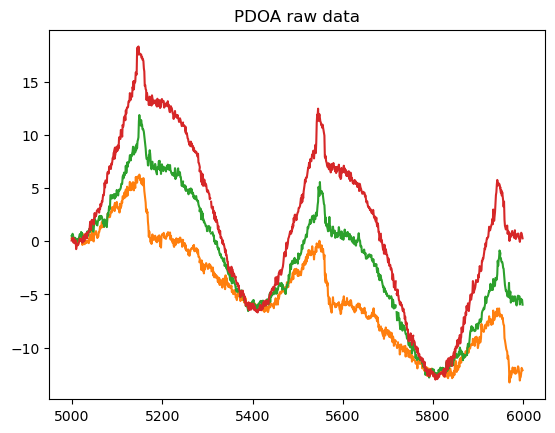

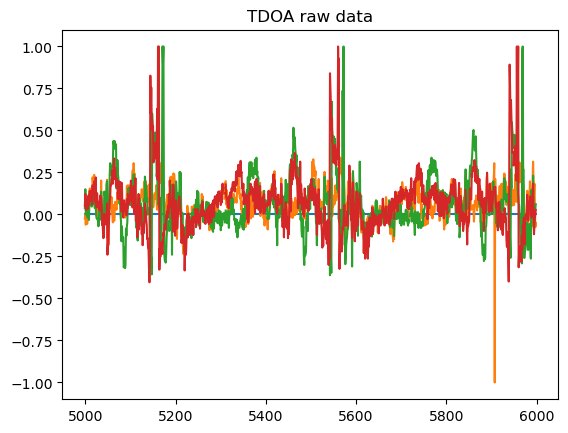

In [8]:

import matplotlib.pyplot as plt
plt.plot(rolling_all,PDOA_all)
plt.title("PDOA raw data")
plt.show()
plt.plot(rolling_all,TDOA_all)
plt.title("TDOA raw data")
plt.show()